In [ ]:
# Code partially generated with the help of ChatGPT (OpenAI, 2025)
# https://www.openai.com/chatgpt

# Code partially generated with the help of CS50.ai (Harvard University, 2025)
# https://www.cs50.ai/chat

# I would like to express my gratitude to the creators and contributors of the libraries and code editor notebooks used in this project. Please read the README.md file in my repository to see the copyright licenses attached.

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('shuffledlabeledAPBtrain.csv')
X = data.iloc[:, :-1:].values
y = data.iloc[:, 0].values

In [3]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [4]:
val_data = pd.read_csv('shuffledlabeledAPBval.csv')
X_val = val_data.iloc[:, :-1:].values
y_val = val_data.iloc[:, 0].values

In [5]:
# Use to debug!
# print("Training labels:", np.unique(y))
# print("Validation labels:", np.unique(y_val))
#print(f"Is _ in y? {'1' in y}")
#print(f"Is _ in y_val? {'1' in y_val}")

#unseen_labels = set(y_val) - set(label_encoder.classes_)

#if unseen_labels:
     # print(f"Unseen labels in validation set: {unseen_labels}")

In [7]:
batch_sizes = [4, 8, 16, 32]
history_dicts = {}

In [8]:
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
   
    model = Sequential([
        Dense(units=80, activation='sigmoid', input_dim=X.shape[1], kernel_initializer='he_normal'),
        Dense(units=1, activation='sigmoid')
    ])
   
    model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])
   
    history = model.fit(X, y, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val))
    history_dicts[batch_size] = history.history

Training with batch size: 4


/home/platobearodog/CYSF_Project/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9063 - loss: 0.2847 - val_accuracy: 0.9747 - val_loss: 11.6629
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9652 - loss: 0.0843 - val_accuracy: 0.9747 - val_loss: 15.8767
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9359 - loss: 0.0528 - val_accuracy: 0.9747 - val_loss: 12.7805
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9851 - loss: 0.0671 - val_accuracy: 0.8734 - val_loss: -5.4657
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9274 - loss: 0.0459 - val_accuracy: 0.9494 - val_loss: -1.0496
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9655 - loss: 0.0324 - val_accuracy: 0.9241 - val_loss: -7.8238
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8633 - loss: -0.2934 - val_accuracy: 0.9494 - val_loss: -5.8131
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9294 - loss: -0.1539 - val_accuracy: 0

In [9]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

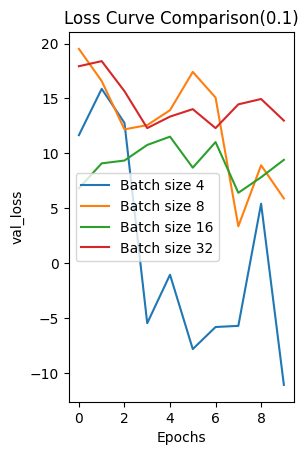

In [10]:
plt.subplot(1, 2, 1)
for batch_size in batch_sizes:
    plt.plot(history_dicts[batch_size]['val_loss'], label=f'Batch size {batch_size}')
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.title('Loss Curve Comparison(0.1)')
plt.legend()

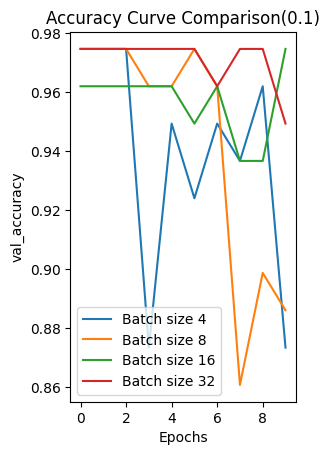

In [11]:
plt.subplot(1, 2, 2)
for batch_size in batch_sizes:
    plt.plot(history_dicts[batch_size]['val_accuracy'], label=f'Batch size {batch_size}')
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.title('Accuracy Curve Comparison(0.1)')
plt.legend()

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>